<a href="https://colab.research.google.com/github/yngdln/math-statistics/blob/main/%D0%9B%D0%B0%D0%B17_%D0%9C%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
data = pd.read_excel('comments.xlsx')

In [ ]:
comments = data.Comment_Datail

In [ ]:
comments

0      cross_validation is deprecated. You can use mo...
1      youtubers like this guy, TechWithTim, Neural N...
2      Hello all.  I'm posting sentdex's code again w...
3      I have tried many other courses and tutorial b...
4      Interestingly enough, I'm getting almost the s...
                             ...                        
590    I am a Web developer(fresher)\nI was searching...
591    WAITING FOR IT FROM 1 MONTH HOPE TO LEARN NEW ...
592    great lecture but notes will be there for this...
593    Uh r inspiration for alot of people... keeping...
594    U gave a whole big contribution to web develop...
Name: Comment_Datail, Length: 595, dtype: object

In [ ]:
words = list(comments.str.split().apply(len))

In [ ]:
words.remove(1408) # удалим выбросы
words.remove(775)

In [ ]:
min(words)

1

In [ ]:
max(words)

278

In [ ]:
n = len(words)
n

593

In [ ]:
import math

In [ ]:
l = math.trunc(1 + np.log2(n)) + 4
l

14

(array([0.0265066 , 0.01389252, 0.00502858, 0.00255691, 0.00119322,
        0.00059661, 0.00017046, 0.00017046, 0.00017046, 0.00017046,
        0.        , 0.        , 0.        , 0.00008523]),
 array([  1.        ,  20.78571429,  40.57142857,  60.35714286,
         80.14285714,  99.92857143, 119.71428571, 139.5       ,
        159.28571429, 179.07142857, 198.85714286, 218.64285714,
        238.42857143, 258.21428571, 278.        ]),
 <BarContainer object of 14 artists>)

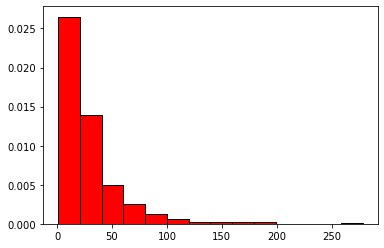

In [ ]:
plt.hist(words, bins=l, edgecolor='black', density=True, color='red')

In [ ]:
mean = np.mean(words)
var = np.var(words)

In [ ]:
a = np.log(mean) - 1 / 2 * np.log(var/mean**2 + 1)

In [ ]:
d = np.sqrt(np.log(var/mean**2 + 1))

In [ ]:
lambd = 1 / mean

In [ ]:
def my_exp(x):
    if x > 0:
        return lambd * np.exp(-lambd*x)
    else: return 0
def cdf(x):
    if x > 0:
        return 1 - np.exp(-lambd*x)

In [ ]:
from scipy.stats import lognorm

In [ ]:
x = np.linspace(1, 300, 1000)

In [ ]:
y = lognorm.pdf(x, s=a, scale=d)

In [ ]:
y_1 = list(map(my_exp, x))

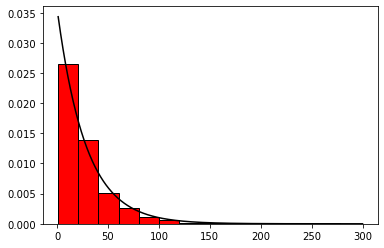

In [ ]:
plt.plot(x, y_1, c='black')
plt.hist(words, bins=l, edgecolor='black', density=True, color='red')
plt.show()

In [ ]:
### Показательное?

In [ ]:
lambd

0.03558142325693028

In [ ]:
from scipy.stats import norm

In [ ]:
alpha = 0.1

In [ ]:
lambd_left = (norm.ppf(alpha/2) * np.sqrt(n) + n) / np.sum(words)
lambd_right = (norm.ppf(1-alpha/2) * np.sqrt(n) + n) / np.sum(words)
print(lambd_left, '---', lambd, '---', lamb_right, '; alpha =', alpha)

0.03317803892290015 --- 0.03558142325693028 --- 0.03798480759096041 ; alpha = 0.1


In [ ]:
hist = np.histogram(words, l)
int1 = hist[1]

In [ ]:
int1

array([  1.        ,  20.78571429,  40.57142857,  60.35714286,
        80.14285714,  99.92857143, 119.71428571, 139.5       ,
       159.28571429, 179.07142857, 198.85714286, 218.64285714,
       238.42857143, 258.21428571, 278.        ])

In [ ]:
pt = list([0]*14)
pt[0] = cdf(int1[1])

In [ ]:
for i in range(1, 13):
    pt[i] = cdf(int1[i+1]) - cdf(int1[i])
pt[13] = cdf(1000) - cdf(int1[13])

In [ ]:
pt

[0.5226881832074823,
 0.24123290837454048,
 0.11931404101045129,
 0.05901284562776532,
 0.029187813266515872,
 0.014436322028168247,
 0.007140219508669388,
 0.0035315598067502396,
 0.0017467130602233372,
 0.0008639260501615009,
 0.0004272987001380235,
 0.00021134237022435443,
 0.00010453015054245895,
 0.00010229683836682213]

In [ ]:
sum(pt)

0.9999999999999997

In [ ]:
pt1 = [a*n for a in pt]

In [ ]:
sum(pt1)

592.9999999999998

#### Выборочный хи-квадрат

In [ ]:
chi2 = 0
f1 = hist[0]
for i in range(13):
    chi2 += (pt1[i] - f1[i])**2 / pt1[i]
chi2 += (pt1[12] + pt1[13] - f1[12] - f1[13])**2 / (pt1[12] + pt1[13])

In [ ]:
chi2

19.48510986499908

In [ ]:
from scipy.stats import chi2
quantile = chi2.ppf(1-alpha, df=12)
quantile

18.54934778670325

In [ ]:
ilya = pd.read_csv('train.csv')

In [ ]:
ilya.fnlwgt

0        366425
1        244602
2        174201
3        110199
4        149248
          ...  
43952     68982
43953    116562
43954    197947
43955     97883
43956    375827
Name: fnlwgt, Length: 43957, dtype: int64

In [ ]:
ilya.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

In [ ]:
ilya = ilya.rename(columns={'Annual Income ($)': 'Income'})

In [ ]:
ilya_2 = ilya.Income

In [ ]:
ilya_2

0        15000
1        35000
2        86000
3        59000
4        38000
         ...  
1995    184387
1996     73158
1997     90961
1998    182109
1999    110610
Name: Income, Length: 2000, dtype: int64

(array([3132., 3051., 6036., 5979., 8597., 5856., 3455., 2416., 1960.,
        1350.,  820.,  505.,  258.,  166.,  113.,   72.,   50.,   35.,
          24.,   25.,   11.,   11.,    4.,    3.,    7.,    3.,    0.,
           4.,    1.,    3.,    1.,    2.,    2.,    1.,    0.,    0.,
           1.,    0.,    0.,    3.]),
 array([  13492. ,   50414.7,   87337.4,  124260.1,  161182.8,  198105.5,
         235028.2,  271950.9,  308873.6,  345796.3,  382719. ,  419641.7,
         456564.4,  493487.1,  530409.8,  567332.5,  604255.2,  641177.9,
         678100.6,  715023.3,  751946. ,  788868.7,  825791.4,  862714.1,
         899636.8,  936559.5,  973482.2, 1010404.9, 1047327.6, 1084250.3,
        1121173. , 1158095.7, 1195018.4, 1231941.1, 1268863.8, 1305786.5,
        1342709.2, 1379631.9, 1416554.6, 1453477.3, 1490400. ]),
 <BarContainer object of 40 artists>)

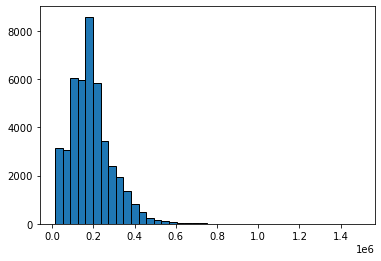

In [ ]:
plt.hist(ilya.fnlwgt, bins=40, edgecolor='black')

In [ ]:
ilya.fnlwgt.describe()

count    4.395700e+04
mean     1.896730e+05
std      1.058215e+05
min      1.349200e+04
25%      1.174960e+05
50%      1.781000e+05
75%      2.376710e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [ ]:
ilya.fnlwgt[:10]

0    366425
1    244602
2    174201
3    110199
4    149248
5    105363
6    216390
7    361888
8     74784
9    118089
Name: fnlwgt, dtype: int64